In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
"""convert image from color to grayscale"""

img = mpimg.imread('images/h.jpeg')
rgb_weights = [0.2989, 0.5870, 0.1140]

img = np.dot(img[...,:3], rgb_weights)

In [3]:
def global_threshold (main_image: np.ndarray, threshold = None):
    """
    Global threshold
    main_image: Image to add noise to
    
    return: Image after threshold
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)
    
    max = 255
    min = 0
    if threshold is None:
        threshold = 100
    nRows, nCols = main_image.shape

    for row in range(nRows):
        for col in range(nCols): 
            if image[row][col] > threshold :
                image [row][col] = max
            elif image[row][col] < threshold :
                image [row][col] = min
                
    return image

In [4]:
def local_threshold(input_img, threshold = None):
    """
    Local threshold
    using Bradley-Roth Adaptive Thresholding Algorithm
    main_image: Image to add noise to
    thresh: specific threshold
    
    return: Image after threshold
    """

    nRows, nCols = input_img.shape
    # Default window size is round(nCols/8)
    #S = nCols/8
    S = nCols/24

    s2 = S/2
    # Compute integral image
    integral_img = np.zeros_like(input_img, dtype=np.uint32)
    for col in range(nCols):
        for row in range(nRows):
            integral_img[row,col] = input_img[0:row,0:col].sum()
    # Default threshold is 15% of the total
    # area in the window
    if threshold is None:
        threshold = 15.0
        
    #output img
    out_img = np.zeros_like(input_img)    

    for col in range(nCols):
        for row in range(nRows):
            #SxS region
            # Access the four corners of each neighbourhood
            # And ensure no coordinates are out of bounds
            y0 = int(max(row-s2, 0))
            y1 = int(min(row+s2, nRows-1))
            x0 = int(max(col-s2, 0))
            x1 = int(min(col+s2, nCols-1))
            # Count how many pixels are in each neighbourhood
            count = (y1-y0)*(x1-x0)
            # Compute areas of each window
            #sum_ = integral_img[y1, x1]-integral_img[y0, x1]-integral_img[y1, x0]+integral_img[y0, x0]
            sum_ = int(integral_img[y1, x1])-int(integral_img[y0, x1])-int(integral_img[y1, x0])+int(integral_img[y0, x0])

            if input_img[row, col]*count < sum_*(100.-threshold)/100.:
                out_img[row,col] = 0
            else:
                out_img[row,col] = 255

    return out_img

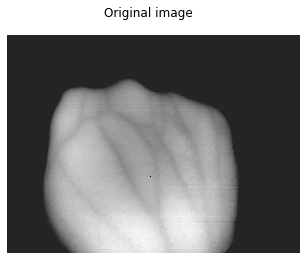

In [5]:
plt.imshow( img, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.suptitle("Original image") 
plt.show() 

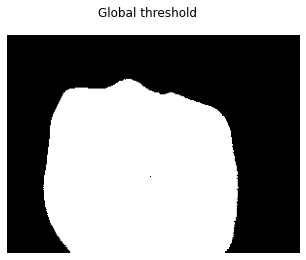

In [6]:
plt.imshow( global_threshold(img,50), cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.suptitle("Global threshold") 
plt.show() 

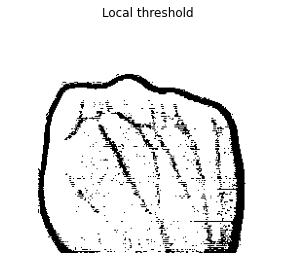

In [7]:
plt.imshow( local_threshold(img,3), cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.suptitle("Local threshold") 
plt.show() 